<a href="https://colab.research.google.com/github/WBruni/Analise_Vendas_e_Desempenho_Loja/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# <font color='green'>Análise de Dados - (Loja-1)</font>

In [2]:
loja = loja.drop(['Vendedor', 'lat', 'lon'], axis=1) # Colunas Retiradas
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,SP,4,cartao_credito,8
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,RJ,1,cartao_credito,4
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,DF,1,cartao_credito,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,RS,4,boleto,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,MG,5,boleto,1


In [3]:
print(loja.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas'],
      dtype='object')


## <font color='green'>Verificação de Valores Faltantes - (Loja-1)</font>

In [4]:
loja.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


## <font color='green'>Tipos de Dados Incorretos - (Loja-1)</font>

In [5]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Local da compra         2359 non-null   object 
 6   Avaliação da compra     2359 non-null   int64  
 7   Tipo de pagamento       2359 non-null   object 
 8   Quantidade de parcelas  2359 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 166.0+ KB


## <font color='green'>Conversão de Tipo de Dados - (Loja-1)</font>

In [76]:
loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], format='%d/%m/%Y')
''' Transforma a coluna Data da Compra de tipo 'object' para 'datetime' '''

loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Local da compra         2359 non-null   object        
 6   Avaliação da compra     2359 non-null   int64         
 7   Tipo de pagamento       2359 non-null   object        
 8   Quantidade de parcelas  2359 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 166.0+ KB


## <font color='green'>Consistência em Colunas Categóricas - (Loja-1)</font>

In [7]:
loja['Produto'].unique()

array(['Assistente virtual', 'Mesa de jantar', 'Jogo de tabuleiro',
       'Micro-ondas', 'Cadeira de escritório', 'Blocos de montar',
       'Boneca bebê', 'Lava louças', 'Lavadora de roupas',
       'Carrinho controle remoto', 'Geladeira', 'Fone de ouvido',
       'Panela de pressão', 'Bicicleta', 'Ciência de dados com python',
       'Bola de vôlei', 'Xadrez de madeira', 'TV Led UHD 4K',
       'Copo térmico', 'Kit banquetas', 'Dashboards com Power BI',
       'Faqueiro', 'Jogo de panelas', 'Bateria', 'Corda de pular',
       'Fogão', 'Cama box', 'Impressora', 'Cômoda', 'Guarda roupas',
       'Dinossauro Rex', 'Guitarra', 'Secadora de roupas',
       'Sofá retrátil', 'Tablet ABXY', 'Cubo mágico 8x8', 'Jogo de copos',
       'Modelagem preditiva', 'Celular Plus X42', 'Mochila',
       'Bola de basquete', 'Headset', 'Poltrona', 'Violão',
       'Iniciando em programação', 'Celular ABXY', 'Smartwatch',
       'Mesa de centro', 'Cama king', 'Smart TV', 'Pandeiro'],
      dtype=object)

In [8]:
loja['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

In [9]:
loja['Local da compra'].unique()

array(['SP', 'RJ', 'DF', 'RS', 'MG', 'CE', 'ES', 'BA', 'TO', 'PR', 'AP',
       'GO', 'AL', 'PI', 'PE', 'AM', 'RN', 'PA', 'PB', 'SC', 'SE', 'MT',
       'MS', 'RO', 'MA', 'AC'], dtype=object)

In [10]:
loja['Tipo de pagamento'].unique()

array(['cartao_credito', 'boleto', 'cupom', 'cartao_debito'], dtype=object)

## <font color='green'>Verificação de Valores Duplicados - (Loja-1)</font>

In [11]:
loja.duplicated().sum()

np.int64(0)

## <font color='green'>Valores Atípicos ou Valores Irreais - (Loja-1)</font>

In [85]:
colunas_numericas = ['Preço', 'Frete', 'Avaliação da compra', 'Quantidade de parcelas']

print(loja[colunas_numericas].describe())

             Preço        Frete  Avaliação da compra  Quantidade de parcelas
count  2359.000000  2359.000000          2359.000000             2359.000000
mean    650.491361    34.691805             3.976685                2.943196
std     819.582778    43.814183             1.415370                2.819897
min      10.070000     0.000000             1.000000                1.000000
25%      74.345000     4.141783             3.000000                1.000000
50%     313.750000    16.498835             5.000000                1.000000
75%     904.130000    48.050074             5.000000                4.000000
max    3969.380000   214.377060             5.000000               24.000000


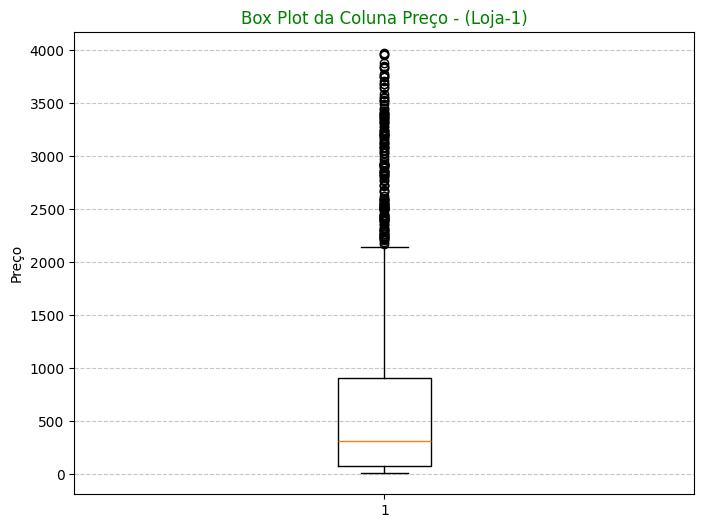

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja['Preço'])
plt.title('Box Plot da Coluna Preço - (Loja-1)', color = 'green')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

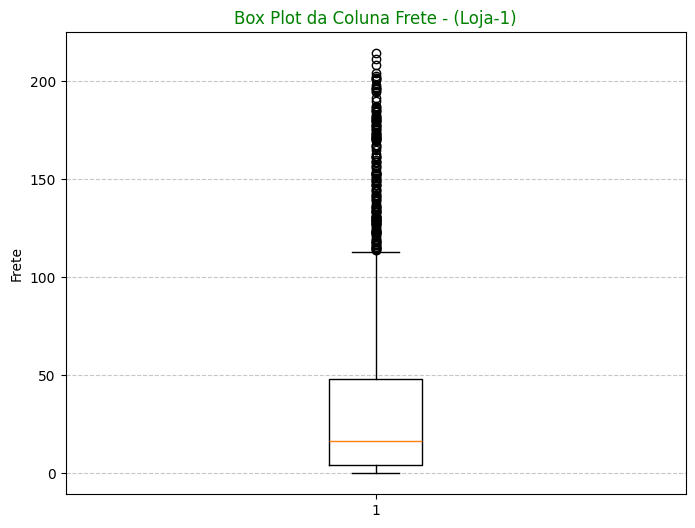

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja['Frete'])
plt.title('Box Plot da Coluna Frete - (Loja-1)', color ='green')
plt.ylabel('Frete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

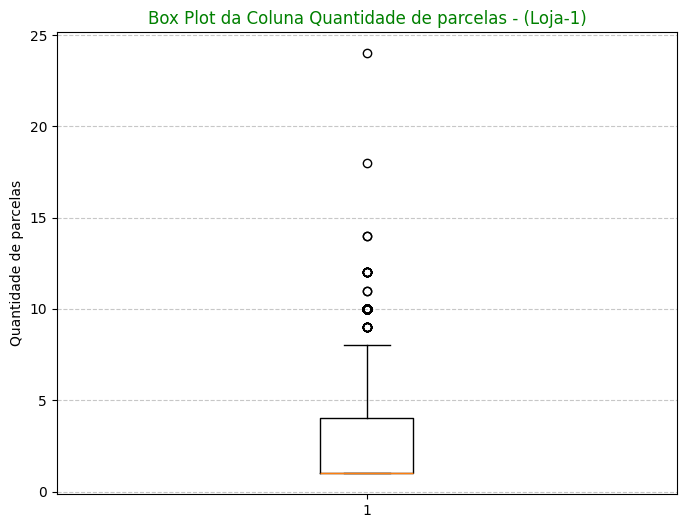

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja['Quantidade de parcelas'])
plt.title('Box Plot da Coluna Quantidade de parcelas - (Loja-1)', color = 'green')
plt.ylabel('Quantidade de parcelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='green'>Registros com Frete igual a zero - (Loja-1)</font>

In [16]:
frete_zero_loja1 = loja[loja['Frete'] == 0]
display(frete_zero_loja1)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
5,Blocos de montar,brinquedos,32.26,0.0,2020-12-03,RS,5,cupom,1
6,Boneca bebê,brinquedos,58.90,0.0,2021-08-07,SP,3,boleto,1
24,Dashboards com Power BI,livros,44.69,0.0,2023-02-14,MG,5,cartao_credito,2
54,Cubo mágico 8x8,brinquedos,22.86,0.0,2021-09-03,RJ,4,boleto,1
60,Corda de pular,esporte e lazer,17.11,0.0,2021-09-25,AL,3,cartao_credito,5
...,...,...,...,...,...,...,...,...,...
2339,Headset,eletronicos,63.95,0.0,2022-03-24,SP,5,cartao_credito,5
2341,Jogo de copos,utilidades domesticas,43.49,0.0,2020-05-28,SP,1,cartao_credito,1
2348,Copo térmico,esporte e lazer,37.76,0.0,2020-03-25,SP,5,cartao_credito,1
2349,Faqueiro,utilidades domesticas,47.63,0.0,2020-06-29,MG,4,boleto,1


In [70]:
frete_por_categoria = frete_zero_loja1['Categoria do Produto'].value_counts()
frete_por_categoria.name = 'Frequência'
print("Categorias de produto com frete zero (Loja-1):")
display(frete_por_categoria)

Categorias de produto com frete zero (Loja-1):


,Frequência
Categoria do Produto,
brinquedos,97
esporte e lazer,39
livros,35
utilidades domesticas,29
instrumentos musicais,6
eletronicos,3


In [61]:
locais_com_frete_zero = frete_zero_loja1['Local da compra'].value_counts()
locais_com_frete_zero.name = 'Frequência'
print("Locais de compra com frete zero (Loja-1):")
display(locais_com_frete_zero)

Locais de compra com frete zero (Loja-1):


,Frequência
Local da compra,
SP,88
RJ,30
MG,19
SC,13
PR,13
RS,11
BA,9
DF,5
ES,4


In [62]:
tipos_pagamento_com_frete_zero = frete_zero_loja1['Tipo de pagamento'].value_counts()
tipos_pagamento_com_frete_zero.name = 'Frequência'
print("Tipos de pagamento com frete zero (Loja-1):")
display(tipos_pagamento_com_frete_zero)

Tipos de pagamento com frete zero (Loja-1):


,Frequência
Tipo de pagamento,
cartao_credito,144
boleto,47
cupom,15
cartao_debito,3


## <font color='green'> Descobertas sobre Registros com Frete Zero - (Loja-1)</font>

Com base na análise dos registros onde o frete foi zero na Loja 1, observamos o seguinte:

*   **Categorias de Produto:**
    *   Brinquedos (97 registros)
    *   Esporte e Lazer (39 registros)
    *   Livros (35 registros)
*   **Locais de Compra:**
    *   SP (88 registros)
    *   RJ (30 registros)
    *   MG (19 registros)
*   **Tipos de Pagamento:**
    *   Cartão de crédito (144 registros)
    *   Boleto (47 registros)
    *   Cupom (15 registros)

Essas observações sugerem que o frete zero na Loja-1 pode estar mais relacionado a certas categorias de produtos (principalmente **brinquedos**, itens de **esporte e lazer** e **livros**), concentrado em alguns estados (**SP**, **RJ** e **MG**) e frequentemente utilizado em pagamentos com **cartão de crédito**.

# <font color='magenta'>Análise de Dados - (Loja-2)</font>

In [28]:
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


In [30]:
loja2 = loja2.drop(['Vendedor', 'lat', 'lon'], axis=1) # Colunas Retiradas
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,MG,1,boleto,1
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,RJ,3,cartao_credito,4
2,Cama king,moveis,591.13,31.759020,22/10/2021,SC,5,cartao_credito,10
3,Cama king,moveis,1208.24,61.919584,04/05/2022,RS,5,cartao_credito,10
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,SP,4,cartao_credito,3


In [31]:
print(loja2.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas'],
      dtype='object')


## <font color='magenta'>Verificação de Valores Faltantes - (Loja-2)</font>

In [32]:
loja2.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


## <font color='magenta'>Tipos de Dados Incorretos - (Loja-2)</font>

In [34]:
loja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Local da compra         2359 non-null   object 
 6   Avaliação da compra     2359 non-null   int64  
 7   Tipo de pagamento       2359 non-null   object 
 8   Quantidade de parcelas  2359 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 166.0+ KB


## <font color='magenta'>Conversão de Tipo de Dados - (Loja-2)</font>

In [35]:
loja2['Data da Compra'] = pd.to_datetime(loja2['Data da Compra'], format='%d/%m/%Y')
''' Transforma a coluna Data da Compra de tipo 'object' para 'datetime' '''

loja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Local da compra         2359 non-null   object        
 6   Avaliação da compra     2359 non-null   int64         
 7   Tipo de pagamento       2359 non-null   object        
 8   Quantidade de parcelas  2359 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 166.0+ KB


## <font color='magenta'>Consistência em Colunas Categóricas - (Loja-2)</font>

In [37]:
loja2['Produto'].unique()

array(['Cadeira de escritório', 'Pandeiro', 'Cama king', 'Violão',
       'Mochila', 'Tablet ABXY', 'Panela de pressão', 'Cubo mágico 8x8',
       'Secadora de roupas', 'Jogo de tabuleiro', 'Xadrez de madeira',
       'Bicicleta', 'Modelagem preditiva', 'Dashboards com Power BI',
       'Corda de pular', 'Jogo de copos', 'Boneca bebê',
       'Ciência de dados com python', 'Lava louças', 'Blocos de montar',
       'Copo térmico', 'Faqueiro', 'Fogão', 'Jogo de panelas',
       'TV Led UHD 4K', 'Poltrona', 'Guitarra', 'Headset',
       'Dinossauro Rex', 'Smart TV', 'Guarda roupas', 'Geladeira',
       'Mesa de centro', 'Lavadora de roupas', 'Bateria', 'Celular ABXY',
       'Bola de basquete', 'Mesa de jantar', 'Kit banquetas', 'Cama box',
       'Bola de vôlei', 'Assistente virtual', 'Sofá retrátil',
       'Carrinho controle remoto', 'Fone de ouvido', 'Micro-ondas',
       'Smartwatch', 'Iniciando em programação', 'Cômoda', 'Impressora',
       'Celular Plus X42'], dtype=object)

In [38]:
loja2['Categoria do Produto'].unique()

array(['moveis', 'instrumentos musicais', 'esporte e lazer',
       'eletronicos', 'utilidades domesticas', 'brinquedos',
       'eletrodomesticos', 'livros'], dtype=object)

In [39]:
loja2['Local da compra'].unique()

array(['MG', 'RJ', 'SC', 'RS', 'SP', 'MT', 'BA', 'GO', 'PA', 'ES', 'PR',
       'CE', 'AM', 'PE', 'AL', 'DF', 'RN', 'MS', 'SE', 'MA', 'PB', 'PI',
       'TO', 'RO', 'AC', 'RR'], dtype=object)

In [40]:
loja2['Tipo de pagamento'].unique()

array(['boleto', 'cartao_credito', 'cupom', 'cartao_debito'], dtype=object)

## <font color='magenta'>Verificação de Valores Duplicados - (Loja-2)</font>

In [41]:
loja2.duplicated().sum()

np.int64(0)

## <font color='magenta'>Valores Atípicos ou Valores Irreais - (Loja-2)</font>

In [86]:
colunas_numericas = ['Preço', 'Frete', 'Avaliação da compra', 'Quantidade de parcelas']

print(loja2[colunas_numericas].describe())

             Preço        Frete  Avaliação da compra  Quantidade de parcelas
count  2359.000000  2359.000000          2359.000000             2359.000000
mean    630.970352    33.621941             4.037304                2.902501
std     794.078997    42.321932             1.356153                2.848416
min      10.160000     0.000000             1.000000                1.000000
25%      72.730000     3.904020             4.000000                1.000000
50%     290.960000    15.406740             5.000000                1.000000
75%     903.580000    47.250196             5.000000                4.000000
max    3937.850000   216.707633             5.000000               24.000000


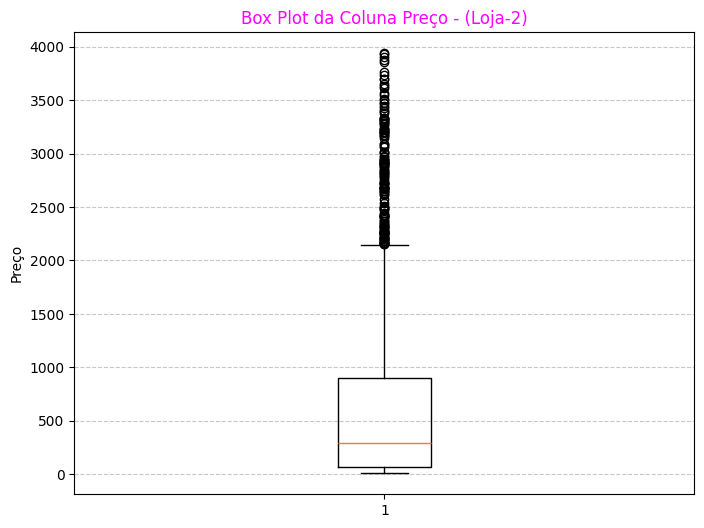

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja2['Preço'])
plt.title('Box Plot da Coluna Preço - (Loja-2)', color = 'magenta')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

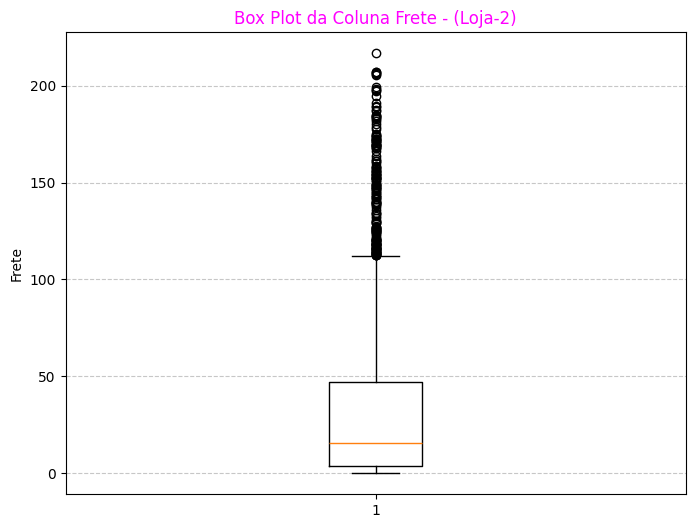

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja2['Frete'])
plt.title('Box Plot da Coluna Frete - (Loja-2)', color = 'magenta')
plt.ylabel('Frete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

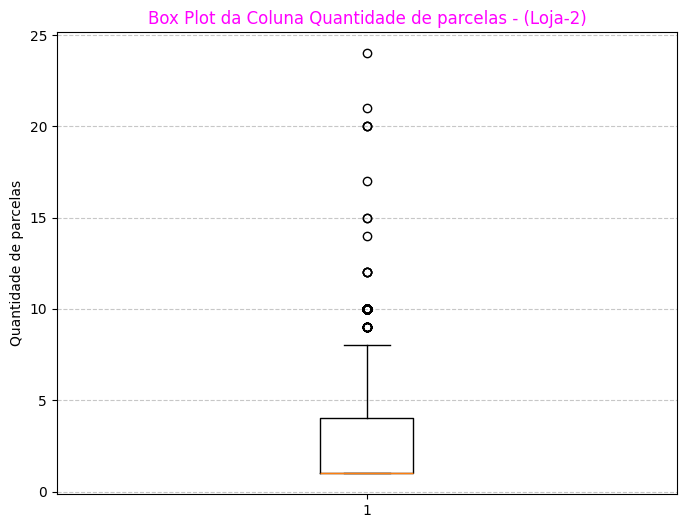

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja2['Quantidade de parcelas'])
plt.title('Box Plot da Coluna Quantidade de parcelas - (Loja-2)', color = 'magenta')
plt.ylabel('Quantidade de parcelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='magenta'>Registros com Frete igual a zero - (Loja-2)</font>

In [54]:
frete_zero_loja2 = loja2[loja2['Frete'] == 0]
display(frete_zero_loja2)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
18,Dashboards com Power BI,livros,42.15,0.0,2020-06-27,MG,5,boleto,1
20,Jogo de copos,utilidades domesticas,58.17,0.0,2023-03-29,RS,1,boleto,1
22,Ciência de dados com python,livros,59.81,0.0,2020-08-13,SP,5,boleto,1
26,Copo térmico,esporte e lazer,57.09,0.0,2021-07-30,RJ,5,cupom,1
33,Boneca bebê,brinquedos,50.63,0.0,2020-05-05,SP,3,cartao_credito,2
...,...,...,...,...,...,...,...,...,...
2304,Xadrez de madeira,brinquedos,44.60,0.0,2022-03-14,PR,5,cartao_credito,5
2306,Cubo mágico 8x8,brinquedos,25.88,0.0,2022-08-22,PA,1,cartao_credito,4
2308,Copo térmico,esporte e lazer,30.17,0.0,2021-10-27,SP,3,cupom,1
2336,Boneca bebê,brinquedos,60.91,0.0,2021-10-22,SP,5,cartao_credito,3


In [56]:
frete_por_categoria_loja2 = frete_zero_loja2['Categoria do Produto'].value_counts()
frete_por_categoria_loja2.name = 'Frequência'
print("Categorias de produto com frete zero (Loja-2):")
display(frete_por_categoria_loja2)

Categorias de produto com frete zero (Loja-2):


,Frequência
Categoria do Produto,
brinquedos,89
esporte e lazer,54
livros,33
utilidades domesticas,26
instrumentos musicais,10
eletronicos,2


In [63]:
locais_com_frete_zero_loja2 = frete_zero_loja2['Local da compra'].value_counts()
locais_com_frete_zero_loja2.name = 'Frequência'
print("Locais de compra com frete zero (Loja-2):")
display(locais_com_frete_zero_loja2)

Locais de compra com frete zero (Loja-2):


,Frequência
Local da compra,
SP,94
RJ,30
MG,20
PR,12
DF,8
SC,8
RS,6
BA,6
MS,5


In [65]:
tipos_pagamento_com_frete_zero_loja2 = frete_zero_loja2['Tipo de pagamento'].value_counts()
tipos_pagamento_com_frete_zero_loja2.name = 'Frequência'
print("Tipos de pagamento com frete zero (Loja-2):")
display(tipos_pagamento_com_frete_zero_loja2)

Tipos de pagamento com frete zero (Loja-2):


,Frequência
Tipo de pagamento,
cartao_credito,159
boleto,39
cupom,13
cartao_debito,3


#<font color='magenta'> Descobertas sobre Registros com Frete Zero - (Loja-2)</font>

Com base na análise dos registros onde o frete foi zero na Loja 2, observamos o seguinte:

*   **Categorias de Produto:**
    *   Brinquedos (89 registros)
    *   Esporte e Lazer (54 registros)
    *   Livros (33 registros)
*   **Locais de Compra:**
    *   SP (94 registros)
    *   RJ (30 registros)
    *   MG (20 registros)
*   **Tipos de Pagamento:**
    *   Cartão de crédito (159 registros)
    *   Boleto (39 registros)
    *   Cupom (13 registros)

Essas observações sugerem que, similar à Loja 1, o frete zero na Loja 2 também pode estar mais relacionado a certas categorias de produtos (principalmente **brinquedos**, itens de **esporte e lazer** e **livros**), concentrado em alguns estados (**SP**, **RJ** e **MG**) e frequentemente utilizado em pagamentos com **cartão de crédito.**

# <font color='orange'>Análise de Dados - (Loja-3)</font>

In [67]:
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


In [68]:
loja3 = loja3.drop(['Vendedor', 'lat', 'lon'], axis=1) # Colunas Retiradas
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,CE,4,cartao_credito,4
1,Cômoda,moveis,386.81,18.180908,10/02/2021,RS,3,cartao_credito,1
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,SP,5,cartao_credito,3
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,BA,4,cartao_credito,6
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,SP,1,cartao_credito,1


In [69]:
print(loja3.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas'],
      dtype='object')


## <font color='orange'>Verificação de Valores Faltantes - (Loja-3)</font>

In [74]:
loja3.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


## <font color='orange'>Tipos de Dados Incorretos - (Loja-3)</font>

In [75]:
loja3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Local da compra         2359 non-null   object 
 6   Avaliação da compra     2359 non-null   int64  
 7   Tipo de pagamento       2359 non-null   object 
 8   Quantidade de parcelas  2359 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 166.0+ KB


## <font color='orange'>Conversão de Tipo de Dados - (Loja-3)</font>

In [77]:
loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'], format='%d/%m/%Y')
''' Transforma a coluna Data da Compra de tipo 'object' para 'datetime' '''

loja3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Local da compra         2359 non-null   object        
 6   Avaliação da compra     2359 non-null   int64         
 7   Tipo de pagamento       2359 non-null   object        
 8   Quantidade de parcelas  2359 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 166.0+ KB


## <font color='orange'>Consistência em Colunas Categóricas - (Loja-3)</font>

In [78]:
loja3['Produto'].unique()

array(['Secadora de roupas', 'Cômoda', 'Violão', 'Bola de vôlei',
       'Guarda roupas', 'Impressora', 'Carrinho controle remoto',
       'Cadeira de escritório', 'Pandeiro', 'Faqueiro', 'Boneca bebê',
       'Fone de ouvido', 'Jogo de copos', 'TV Led UHD 4K',
       'Panela de pressão', 'Lavadora de roupas', 'Jogo de panelas',
       'Dinossauro Rex', 'Modelagem preditiva', 'Mesa de jantar',
       'Dashboards com Power BI', 'Kit banquetas', 'Corda de pular',
       'Iniciando em programação', 'Bola de basquete', 'Fogão',
       'Bicicleta', 'Lava louças', 'Smart TV', 'Mochila', 'Tablet ABXY',
       'Mesa de centro', 'Cama box', 'Xadrez de madeira',
       'Celular Plus X42', 'Cama king', 'Smartwatch',
       'Ciência de dados com python', 'Geladeira', 'Headset',
       'Jogo de tabuleiro', 'Bateria', 'Guitarra', 'Sofá retrátil',
       'Poltrona', 'Assistente virtual', 'Copo térmico', 'Celular ABXY',
       'Micro-ondas', 'Cubo mágico 8x8', 'Blocos de montar'], dtype=object)

In [79]:
loja3['Categoria do Produto'].unique()

array(['eletrodomesticos', 'moveis', 'instrumentos musicais',
       'esporte e lazer', 'eletronicos', 'brinquedos',
       'utilidades domesticas', 'livros'], dtype=object)

In [80]:
loja3['Local da compra'].unique()

array(['CE', 'RS', 'SP', 'BA', 'MG', 'RJ', 'PI', 'GO', 'PE', 'DF', 'ES',
       'PA', 'SC', 'PR', 'RN', 'TO', 'MT', 'SE', 'AL', 'RO', 'MS', 'AM',
       'MA', 'PB', 'AP', 'AC', 'RR'], dtype=object)

In [81]:
loja3['Tipo de pagamento'].unique()

array(['cartao_credito', 'boleto', 'cupom', 'cartao_debito'], dtype=object)

## <font color='orange'>Verificação de Valores Duplicados - (Loja-3)</font>

In [82]:
loja3.duplicated().sum()

np.int64(0)

## <font color='orange'>Valores Atípicos ou Valores Irreais - (Loja-3)</font>

In [84]:
colunas_numericas = ['Preço', 'Frete', 'Avaliação da compra', 'Quantidade de parcelas']

print(loja3[colunas_numericas].describe())

             Preço        Frete  Avaliação da compra  Quantidade de parcelas
count  2359.000000  2359.000000          2359.000000             2359.000000
mean    620.612560    33.074464             4.048326                2.967783
std     774.191691    41.260516             1.386426                2.812153
min      10.080000     0.000000             1.000000                1.000000
25%      76.560000     4.149261             4.000000                1.000000
50%     301.670000    15.879702             5.000000                2.000000
75%     888.040000    46.635503             5.000000                4.000000
max    3957.620000   211.257624             5.000000               24.000000


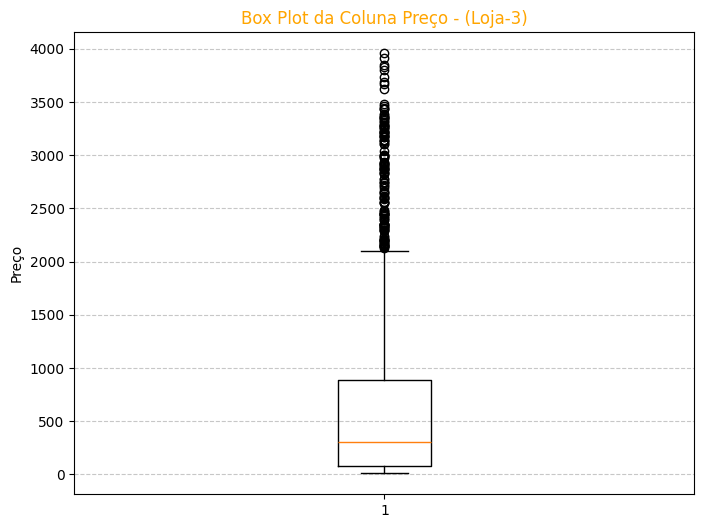

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja3['Preço'])
plt.title('Box Plot da Coluna Preço - (Loja-3)', color = 'orange')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

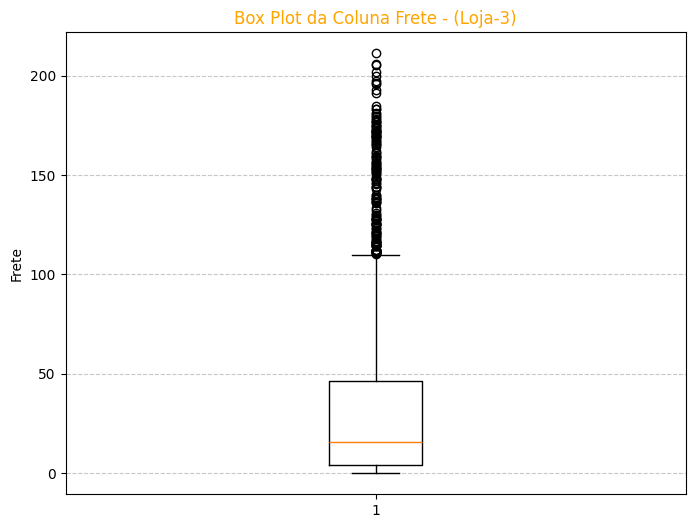

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja3['Frete'])
plt.title('Box Plot da Coluna Frete - (Loja-3)', color = 'orange')
plt.ylabel('Frete')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

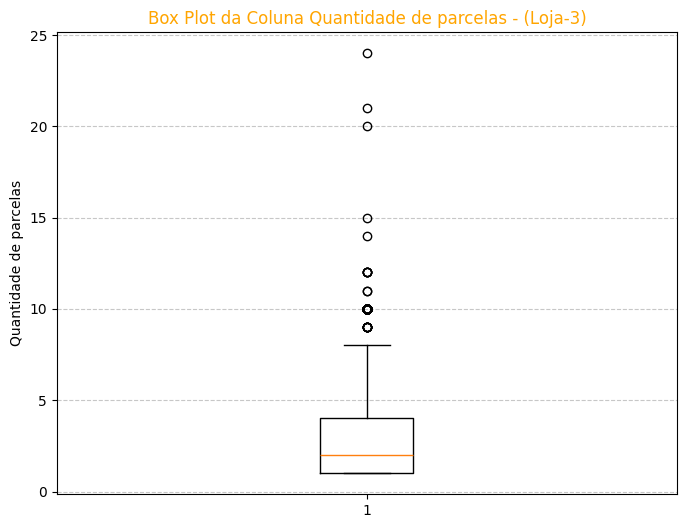

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja3['Quantidade de parcelas'])
plt.title('Box Plot da Coluna Quantidade de parcelas - (Loja-3)', color = 'orange')
plt.ylabel('Quantidade de parcelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='orange'>Registros com Frete igual a zero - (Loja-3)</font>

In [92]:
frete_zero_loja3 = loja2[loja3['Frete'] == 0]
display(frete_zero_loja3)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
9,Cubo mágico 8x8,brinquedos,12.09,5.123795,2021-09-04,SP,5,cartao_credito,1
10,Mochila,esporte e lazer,115.70,12.402612,2020-04-18,MG,5,cartao_credito,5
22,Ciência de dados com python,livros,59.81,0.000000,2020-08-13,SP,5,boleto,1
37,Dinossauro Rex,brinquedos,22.62,2.092862,2020-07-25,BA,1,cartao_credito,1
68,Blocos de montar,brinquedos,58.53,0.000000,2022-01-30,MG,5,cartao_credito,2
...,...,...,...,...,...,...,...,...,...
2323,Panela de pressão,utilidades domesticas,100.03,6.013309,2021-03-19,SP,5,cartao_credito,2
2325,Faqueiro,utilidades domesticas,68.52,4.179588,2022-06-04,RS,3,boleto,1
2337,Cômoda,moveis,381.82,20.857031,2021-09-07,PB,5,boleto,1
2341,Smartwatch,eletronicos,225.36,9.584181,2020-06-26,RJ,5,cartao_credito,6


In [93]:
frete_por_categoria_loja3 = frete_zero_loja3['Categoria do Produto'].value_counts()
frete_por_categoria_loja3.name = 'Frequência'
print("Categorias de produto com frete zero (Loja-3):")
display(frete_por_categoria_loja3)

Categorias de produto com frete zero (Loja-3):


,Frequência
Categoria do Produto,
moveis,42
eletronicos,33
eletrodomesticos,30
brinquedos,29
instrumentos musicais,26
esporte e lazer,19
livros,18
utilidades domesticas,11


In [94]:
locais_com_frete_zero_loja3 = frete_zero_loja3['Local da compra'].value_counts()
locais_com_frete_zero_loja3.name = 'Frequência'
print("Locais de compra com frete zero (Loja-3):")
display(locais_com_frete_zero_loja3)

Locais de compra com frete zero (Loja-3):


,Frequência
Local da compra,
SP,85
RJ,28
MG,26
RS,13
SC,9
GO,6
PR,6
BA,5
CE,4


In [95]:
tipos_pagamento_com_frete_zero_loja3 = frete_zero_loja2['Tipo de pagamento'].value_counts()
tipos_pagamento_com_frete_zero_loja3.name = 'Frequência'
print("Tipos de pagamento com frete zero (Loja-3):")
display(tipos_pagamento_com_frete_zero_loja3)

Tipos de pagamento com frete zero (Loja-3):


,Frequência
Tipo de pagamento,
cartao_credito,159
boleto,39
cupom,13
cartao_debito,3


#<font color='orange'>Descobertas sobre Registros com Frete Zero - (Loja-3)</font>

Com base na análise dos registros onde o frete foi zero na Loja 3, observamos o seguinte:

*   **Categorias de Produto:**
    *   Móveis (42 registros)
    *   Eletrônicos (33 registros)
    *   Eletrodomésticos (30 registros)
*   **Locais de Compra:**
    *   SP (85 registros)
    *   RJ (28 registros)
    *   MG (26 registros)
*   **Tipos de Pagamento:**
    *   Cartao de crédito (159 registros)
    *   Boleto (39 registros)
    *   Cupom (13 registros)

Essas observações sugerem que o frete zero na Loja 3 apresenta um padrão de categorias de produto ligeiramente diferente das Lojas 1 e 2, com destaque para **móveis**, **eletrônicos** e **eletrodomésticos**. No entanto, a concentração em locais de compra como **SP**, **RJ** e **MG**, e a predominância do **cartão de crédito** como tipo de pagamento, são similares às outras lojas.

#1. Análise do faturamento



# 2. Vendas por Categoria

# 3. Média de Avaliação das Lojas


# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja